In [11]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pylab as plt


In [12]:
X, y = make_blobs(n_samples=100, centers = 4, n_features=2, random_state=6)
points= pd.DataFrame(X, y)
points.head(5)

,0,1
3,0.276181,-2.217047
1,7.927368,-9.761527
0,8.491428,-2.549749
2,-11.537102,2.434883
1,4.292259,-8.992204


<AxesSubplot:xlabel='0', ylabel='1'>

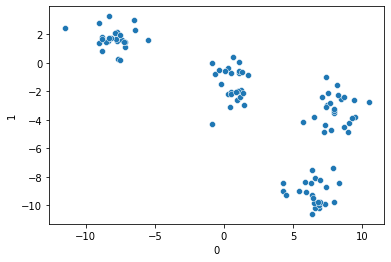

In [13]:
sns.scatterplot(x=0,y=1, data=points, palette = "Set2")

In [14]:
centroids = points.sample(4, random_state=1)
centroids

,0,1
2,-8.842286,1.786914
1,4.510561,-9.305970
1,5.883975,-8.372845
2,-8.831594,1.690414


In [17]:
distance = sp.spatial.distance.cdist(points,centroids, "euclidean")
cluster_num = np.argmin(distance,axis = 1)
result = points.copy()
result['cluster'] = np.array(cluster_num)
result.head()

,0,1,cluster
3,0.276181,-2.217047,1
1,7.927368,-9.761527,2
0,8.491428,-2.549749,2
2,-11.537102,2.434883,0
1,4.292259,-8.992204,1


<AxesSubplot:xlabel='0', ylabel='1'>

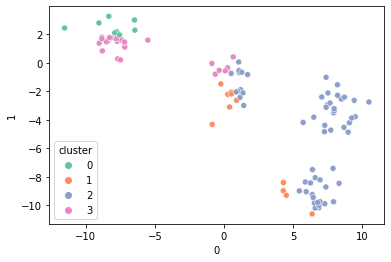

In [18]:
sns.scatterplot(x=0, y=1, hue="cluster",data=result, palette="Set2")

In [19]:
centroids_2 = result.groupby('cluster').mean()
centroids_2

,0,1
cluster,,
0,-8.211603,2.420481
1,1.913263,-5.034035
2,6.180105,-5.007395
3,-5.728498,0.878158


In [20]:
distance = sp.spatial.distance.cdist(points,centroids_2, "euclidean")
cluster_num = np.argmin(distance,axis = 1)
result = points.copy()
result['cluster'] = np.array(cluster_num)
result.head()


,0,1,cluster
3,0.276181,-2.217047,1
1,7.927368,-9.761527,2
0,8.491428,-2.549749,2
2,-11.537102,2.434883,0
1,4.292259,-8.992204,2


<AxesSubplot:xlabel='0', ylabel='1'>

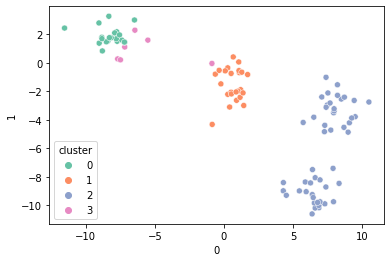

In [21]:
sns.scatterplot(x=0, y=1, hue="cluster",data=result, palette="Set2")

<AxesSubplot:xlabel='0', ylabel='1'>

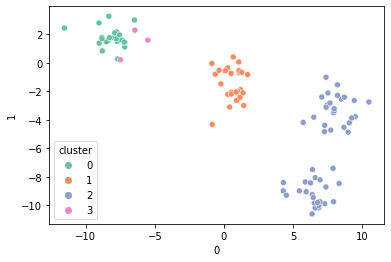

In [22]:
centroids_3 = result.groupby('cluster').mean()
distance = sp.spatial.distance.cdist(points,centroids_3, "euclidean")
cluster_num = np.argmin(distance,axis = 1)
result = points.copy()
result['cluster'] = np.array(cluster_num)
result.head()
sns.scatterplot(x=0, y=1, hue="cluster",data=result, palette="Set2")

<AxesSubplot:xlabel='0', ylabel='1'>

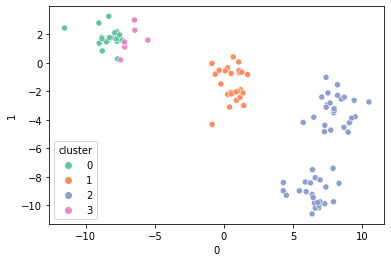

In [23]:
centroids_4 = result.groupby('cluster').mean()
distance = sp.spatial.distance.cdist(points,centroids_4, "euclidean")
cluster_num = np.argmin(distance,axis = 1)
result = points.copy()
result['cluster'] = np.array(cluster_num)
result.head()
sns.scatterplot(x=0, y=1, hue="cluster",data=result, palette="Set2")

### sklearn-cluster

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)

KMeans(n_clusters=4)

In [34]:
result_by_sklearn = points.copy()
result_by_sklearn['cluster'] = kmeans.labels_
result_by_sklearn.head()

,0,1,cluster
3,0.276181,-2.217047,2
1,7.927368,-9.761527,1
0,8.491428,-2.549749,3
2,-11.537102,2.434883,0
1,4.292259,-8.992204,1


<AxesSubplot:xlabel='0', ylabel='1'>

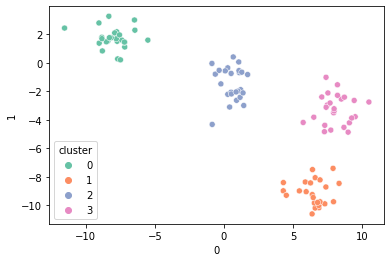

In [35]:
sns.scatterplot(x=0,y=1,hue="cluster", data = result_by_sklearn, palette="Set2")